In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
#vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
#inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
#mobilenet_model = mobilenet.MobileNet(weights='imagenet')

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


102858752/102853048 [==============================] - 120s 1us/step


In [72]:
from utils import *
X_train, Y_train = load_fashion_mnist("./fashionmnist/", kind = 'train')
X_test, Y_test = load_fashion_mnist("./fashionmnist/", kind = 't10k')
X_train = normalize(X_train)
X_test = normalize(X_test)
n_classes = 10
Y_train = np_utils.to_categorical(Y_train, n_classes)

In [73]:
X_resized = []
height, width = 28, 28
im_bg = np.zeros((32, 32))
pad_top, pad_left = 2,2
height, width = 28, 28
nchannels = 3
for img in X_train.reshape((len(X_train),28,28)):
    im_bg[pad_top:pad_top + height,
          pad_left:pad_left + width] = img
    new_img = np.stack((im_bg,)*3, -1)
    X_resized.append(new_img)
X_train = np.array(X_resized)

In [68]:
import keras.datasets

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

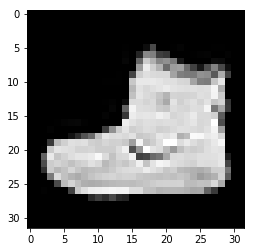

In [66]:
plt.imshow(X_train[0], cmap="gist_gray")
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

from keras.applications import resnet50
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

# create the base pre-trained model
base_model = resnet50.ResNet50(weights='imagenet', include_top=False)

In [7]:
n_classes = 10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

In [8]:
model = Model(inputs=base_model.input, outputs=out)
for layer in base_model.layers:
    layer.trainable = False

In [9]:
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [10]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5, verbose=0)]

In [74]:
n_epochs = 20
batch_size = 512
history = model.fit(X_train, Y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 964s 20ms/step - loss: 0.8379 - acc: 0.7301 - val_loss: 3.8669 - val_acc: 0.1003
Epoch 2/20
48000/48000 [==============================] - 943s 20ms/step - loss: 0.4654 - acc: 0.8357 - val_loss: 4.4466 - val_acc: 0.1003
Epoch 3/20
48000/48000 [==============================] - 934s 19ms/step - loss: 0.3555 - acc: 0.8735 - val_loss: 4.3249 - val_acc: 0.1721
Epoch 4/20
48000/48000 [==============================] - 939s 20ms/step - loss: 0.2736 - acc: 0.9048 - val_loss: 4.7356 - val_acc: 0.1463
Epoch 5/20
48000/48000 [==============================] - 932s 19ms/step - loss: 0.2098 - acc: 0.9295 - val_loss: 4.4150 - val_acc: 0.1118
Epoch 6/20
48000/48000 [==============================] - 936s 19ms/step - loss: 0.1673 - acc: 0.9464 - val_loss: 4.9189 - val_acc: 0.0983
Epoch 7/20
48000/48000 [==============================] - 939s 20ms/step - loss: 0.1370 - acc: 0.9579 - val_loss: 4.

In [ ]:
plt.plot(np.arange(len(history.history['acc'])), history.history['acc'], label='training')
plt.plot(np.arange(len(history.history['val_acc'])), history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('batches')
plt.ylabel('accuracy ')
plt.legend(loc=0)
plt.show()

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
filename = '/export/scratch/cv_6krekele/train_photos/170.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
#plt.imshow(original)
#plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
#plt.imshow(np.uint8(numpy_image))
#plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

FileNotFoundError: [Errno 2] No such file or directory: '/export/scratch/cv_6krekele/train_photos/170.jpg'

In [ ]:
test

In [ ]:
test = X_train[0]
print(test.shape)
image_batch = np.expand_dims(test, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [ ]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)